Prueba_Dani


In [1]:
# Paquetes del notebook visto en clase
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn

# Cargamos otros paquetes que nos pueden ser útiles
import pandas as pd

[nltk_data] Downloading package wordnet to C:\Users\Daniel
[nltk_data]     Parra\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



# Paso 1
Hay que cargar el archivo `NRC-EmoLex.txt` y decidir cómo organizarlo para que tenga un acceso rápido en memoria. (Este archivo lo obtivimos borrando la última columna que se correspondía a su traducción al español).


In [ ]:
Tabla_emo=pd.read_csv('NRC-EmoLex.txt', sep='\t')
print(Tabla_emo.head())

## Podríamos eliminar las filas que sumen 0 para que "sea una búsqueda más rápida"


  English Word  anger  anticipation  disgust  fear  joy  negative  positive  \
0        aback      0             0        0     0    0         0         0   
1       abacus      0             0        0     0    0         0         0   
2      abandon      0             0        0     1    0         1         0   
3    abandoned      1             0        0     1    0         1         0   
4  abandonment      1             0        0     1    0         1         0   

   sadness  surprise  trust  
0        0         0      0  
1        0         0      1  
2        1         0      0  
3        1         0      0  
4        1         1      0  


In [ ]:
print(Tabla_emo.iloc[:, 0])
print(Tabla_emo.iloc[:, 0]=='aback')
print(Tabla_emo[Tabla_emo.iloc[:, 0]=='aback'])
prueba=Tabla_emo[Tabla_emo.iloc[:, 0]=='abandon']
print(prueba.columns[(prueba==1).any()]) ## Para saber el tipo de emoción

#print(Tabla_emo[Tabla_emo.iloc[:, 0]=='abandon', Tabla_emo.iloc[Tabla_emo.iloc[:, 0]=='abandon', 1:]==1])

0              aback
1             abacus
2            abandon
3          abandoned
4        abandonment
            ...     
14149           zone
14150            zoo
14151     zoological
14152        zoology
14153           zoom
Name: English Word, Length: 14154, dtype: object
0         True
1        False
2        False
3        False
4        False
         ...  
14149    False
14150    False
14151    False
14152    False
14153    False
Name: English Word, Length: 14154, dtype: bool
  English Word  anger  anticipation  disgust  fear  joy  negative  positive  \
0        aback      0             0        0     0    0         0         0   

   sadness  surprise  trust  
0        0         0      0  
Index(['fear', 'negative', 'sadness'], dtype='object')


Ahora preparamos una función capaz de identificar la emoción

In [ ]:
def get_emo(palabra):
    Emo=
    fila=Tabla_emo[Tabla_emo.iloc[:, 0]==palabra]
    print(fila)
    if sum(Tabla_emo.iloc[:, 1:])==0:
        print("No hay una emoción con la que se corresponda")

Emo=get_emo('aback')
print(Emo)

  English Word  anger  anticipation  disgust  fear  joy  negative  positive  \
0        aback      0             0        0     0    0         0         0   

   sadness  surprise  trust  
0        0         0      0  


# Paso 2
Utilizar WordNet desde NLTK paraincluir sinónimos, hipónimos, hiperónimos y palabras derivadas en la tabla.

# Aquí ponemos chunks antiguos que hice en el trabajo y sen van a borrar (por si resultan importantes por X motivo)

In [ ]:
## BORRAR

# Extendemos el léxico NRC usando relaciones de WordNet y el diccionario generado en el apartado 1: Diccionario {palabra: [emociones]}.

# Para cada palabra en el léxico original:
# - Obtiene sinónimos (synsets)
# - Obtiene hipónimos (términos más específicos)
# - Obtiene hiperónimos (términos más generales)
# - Obtiene formas derivadas (como plurales)
# Finalmente obtendremos un diccionario {(lemma, pos_tag): [emociones]} con dichas implementaciones


# Función útil para guardar correctamente en el diccionario extendido.
def add_to_lexicon(key, emotions):
    """
    Añade la key y las emociones al diccionario extendido asegurándose de que no se reescriban las keys y acumulando las emociones (sin que se dupliquen) 
    en caso de que haya repeticiones.
    
    Args:
        key: tupla construida con el lemma y el POS-tag de la palabra.
        emotions: emociones correspondientes a la key proporcionada.
    
    Returns:
        dict: Diccionario actualizado {(lemma, POS-tag): [lista_de_emociones]} expandido y sin repeticiones
    """
    if key in extended_lexicon:
        # Para combinar sin duplicar y no arriesgarnos a perder información
        extended_lexicon[key] = list(set(extended_lexicon[key]) | set(emotions))
    else:
        extended_lexicon[key] = emotions


# Código para expandir el díccionario
extended_lexicon = {}

print("Extendiendo léxico con WordNet...")

for word, emotions in nrc_lexicon.items():
    # Obtenemos synsets de la palabra
    synsets = wn.synsets(word)
    
    for synset in synsets:
        # POS tag de WordNet y buscamos su complementario en penn
        wn_pos = synset.pos()
        penn_pos = wordnet_to_penn.get(wn_pos, 'NN')    # Le indicamos que, en caso de no encontrar su correspondiente en el diccionario utilice 'NN'
        
        # Agregamos la palabra original, la cual de por sí es lemma
        key = (word, penn_pos)    
        add_to_lexicon(key, emotions)
        
        # Agregamos los sinónimos del synset
        for lemma in synset.lemmas():
            lemma_name = lemma.name().replace('_', ' ').lower()
            key = (lemma_name, penn_pos)
            add_to_lexicon(key, emotions)
            
            
            # Agregamos formas derivadas
            try:
                for related in lemma.derivationally_related_forms():
                    related_pos = related.synset().pos()
                    related_penn = wordnet_to_penn.get(related_pos, 'NN')
                    related_name = related.name().replace('_', ' ').lower()
                    key = (related_name, related_penn)
                    add_to_lexicon(key, emotions)
            except:
                pass
        
        # Agregamos los hipónimos (términos más específicos)
        for hyponym in synset.hyponyms():
            for lemma in hyponym.lemmas():
                hyp_name = lemma.name().replace('_', ' ').lower()
                hyp_pos = wordnet_to_penn.get(hyponym.pos(), 'NN')
                key = (hyp_name, hyp_pos)
                add_to_lexicon(key, emotions)
        
        # Agragamos los hiperónimos (términos más generales)
        for hypernym in synset.hypernyms():
            for lemma in hypernym.lemmas():
                hyper_name = lemma.name().replace('_', ' ').lower()
                hyper_pos = wordnet_to_penn.get(hypernym.pos(), 'NN')
                key = (hyper_name, hyper_pos)
                add_to_lexicon(key, emotions)

# Nos aseguramos de que no haya duplicados y de que estén ordenados
for k in extended_lexicon:
    extended_lexicon[k] = sorted(set(extended_lexicon[k]))

print(f"Léxico extendido de {len(nrc_lexicon)} a {len(extended_lexicon)} entradas")


#####################################################################################
# Código para generar el diccionario con el léxicon no expandido:
original_lexicon = {}

print("\nObteniendo diccionario de léxico no extendido con WordNet...")

for word, emotions in nrc_lexicon.items():
    # Obtener synsets de la palabra
    synsets = wn.synsets(word)
    
    for synset in synsets:
        # POS tag de WordNet y buscamos su complementario en penn
        wn_pos = synset.pos()
        penn_pos = wordnet_to_penn.get(wn_pos, 'NN')    # Le indicamos que, en caso de no encontrar su correspondiente en el diccionario utilice 'NN'
        
        # Agregamos la palabra original, la cual de por sí es lemma
        key = (word, penn_pos)    
        original_lexicon[key] = emotions

# Nos aseguramos de que no haya duplicados y de que estén ordenados
for k in original_lexicon:
    original_lexicon[k] = sorted(set(original_lexicon[k]))

print(f"Son iguales las entradas originales: {len(nrc_lexicon)} a las de lexicón no extendido: {len(original_lexicon)} entradas")


Extendiendo léxico con WordNet...
Léxico extendido de 6453 a 55155 entradas

Obteniendo diccionario de léxico no extendido con WordNet...
Son iguales las entradas originales: 6453 a las de lexicón no extendido: 9469 entradas


In [ ]:
## BORRAR
# Mostrar ejemplos 
print("\nEjemplos del léxico extendido:")
for key in list(extended_lexicon.keys())[:10]:
    print(f"  {key}: {extended_lexicon[key]}")


Ejemplos del léxico extendido:
  ('abacus', 'NN'): ['positive', 'trust']
  ('tablet', 'NN'): ['positive', 'trust']
  ('calculator', 'NN'): ['anger', 'disgust', 'fear', 'negative', 'positive', 'sadness', 'trust']
  ('calculating machine', 'NN'): ['anger', 'disgust', 'fear', 'negative', 'positive', 'sadness', 'trust']
  ('abandon', 'NN'): ['anticipation', 'fear', 'joy', 'negative', 'positive', 'sadness', 'trust']
  ('wantonness', 'NN'): ['anger', 'disgust', 'fear', 'negative', 'sadness']
  ('wanton', 'JJS'): ['fear', 'negative', 'sadness']
  ('unconstraint', 'NN'): ['fear', 'negative', 'sadness']
  ('unrestraint', 'NN'): ['fear', 'negative', 'sadness']
  ('wildness', 'NN'): ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']


In [ ]:
## BORRAR
## Resultados Dania

In [ ]:
## BORRAR
# Realizamos el análisis
analysis_results = analyze_all_books(book_texts, extended_lexicon)

Analizando emociones en las novelas...

Analizando: Crime and Punishment...  POS desconocido 'c' para palabra 'and'. Se omite.
 POS desconocido 'c' para palabra 'by'. Se omite.
 POS desconocido 'c' para palabra 'by'. Se omite.
 POS desconocido 'c' para palabra 'a'. Se omite.
 POS desconocido 'c' para palabra 'about'. Se omite.
 POS desconocido 'c' para palabra 'the'. Se omite.
 POS desconocido 'c' para palabra 'to'. Se omite.
 POS desconocido 'c' para palabra 'the'. Se omite.
 POS desconocido 'c' para palabra 'of'. Se omite.
 POS desconocido 'c' para palabra 'a'. Se omite.
 POS desconocido 'c' para palabra 'and'. Se omite.
 POS desconocido 'c' para palabra 'but'. Se omite.
 POS desconocido 'c' para palabra 'that'. Se omite.
 POS desconocido 'c' para palabra 'with'. Se omite.
 POS desconocido 'c' para palabra 'five'. Se omite.
 POS desconocido 'c' para palabra 'in'. Se omite.
 POS desconocido 'c' para palabra 'two'. Se omite.
 POS desconocido 'c' para palabra 'the'. Se omite.
 POS desco

# Versión léxico NO extendido
## Tarea 4: Analizar emociones en los textos (3.0 puntos)

In [ ]:
# Realizamos el análisis para el léxico no extendido
analysis_results = analyze_all_books(book_texts, original_lexicon)

Analizando emociones en las novelas...

Analizando: Crime and Punishment...  POS desconocido 'c' para palabra 'and'. Se omite.
 POS desconocido 'c' para palabra 'by'. Se omite.
 POS desconocido 'c' para palabra 'by'. Se omite.
 POS desconocido 'c' para palabra 'a'. Se omite.
 POS desconocido 'c' para palabra 'about'. Se omite.
 POS desconocido 'c' para palabra 'the'. Se omite.
 POS desconocido 'c' para palabra 'to'. Se omite.
 POS desconocido 'c' para palabra 'the'. Se omite.
 POS desconocido 'c' para palabra 'of'. Se omite.
 POS desconocido 'c' para palabra 'a'. Se omite.
 POS desconocido 'c' para palabra 'and'. Se omite.
 POS desconocido 'c' para palabra 'but'. Se omite.
 POS desconocido 'c' para palabra 'that'. Se omite.
 POS desconocido 'c' para palabra 'with'. Se omite.
 POS desconocido 'c' para palabra 'five'. Se omite.
 POS desconocido 'c' para palabra 'in'. Se omite.
 POS desconocido 'c' para palabra 'two'. Se omite.
 POS desconocido 'c' para palabra 'the'. Se omite.
 POS desco

#### Conclusiones

En esta sección, comenta brevemente los resultados obtenidos.
* ¿Qué emociones son las más frecuentes en general?
* ¿Hay novelas que destacan por alguna emoción en particular?
* ¿Qué limitaciones has encontrado?

# Conclusiones

En este trabajo hemos aplicado técnicas de Procesamiento del Lenguaje Natural (PLN) para analizar el contenido emocional de 10 obras literarias clásicas. Hemos comparado dos enfoques metodológicos: un léxico emocional básico (NRC EmoLex) y su versión extendida mediante relaciones semánticas de WordNet. Los resultados muestran diferencias en la detección emocional y plantean cuestionamientos sobre la validez de extensiones léxicas automáticas.

Uno de los hallazgos principales ha sido el **impacto de la extensión léxica**. En el léxico no extendido hemos obtenido **301,442 emociones totales** detectadas mientras que en el léxico extendido, **2,226,176 emociones totales**. Esto supone un incremento medio de 638% (rango: 500-781%) por lo que podemos decir que la extensión del léxico mediante WordNet multiplica por 6-8 la cantidad de emociones detectadas. No obstante, este incremento no refleja necesariamente una mejora en la precisión del análisis, sino una sobre-sensibilización del sistema, ya que, como se ha mencionado anteriormente, se están detectando y asociando emociones a palabras que pueden que no sean correctas. 

Por ejemplo, en "The Adventures of Sherlock Holmes" hemos obtenido 14,978 en el léxico no extendido → 132,092 emociones en el léxico extendido (lo que supone un inremento del 782%). Este es el mayor incremento, indicando que el vocabulario de Conan Doyle activa muchas cadenas semánticas en WordNet. Además, hemos identificado que el léxico extendido hereda emociones de forma transitiva. Asi, "calculator" adquiere las emociones de "abacus" por ser sinónimo, y luego las de todos sus hipónimos e hiperónimos. Esto genera "ruido emocional" en lugar de precisión.

También hemos detectado una **predominancia universal de emociones positivas**. Así, en el léxico no extendido hemos obtenido **68,870** positivas (63.1% del total positivas+negativas); **40,344** (36.9%) negativas. Esto supone un ratio global de **63:37 (positivo:negativo)**. En el léxico extendido hemos obtenido **312,332** positivas (53.7% del total); **269,461** negativas (46.3%). Esto supone un ratio de **54:46 (positivo:negativo)**. De ello hemos concluido que: 
- Todas las novelas analizadas (incluyendo "Crime and Punishment" y "Frankenstein", obras consideradas oscuras) muestran predominio de sentimientos positivos.
- El lenguaje literario usa más palabras "positivas" en contextos narrativos generales, independientemente del tono emocional de la escena.
- El análisis léxico sin contexto no distingue entre "happy ending" (positivo) y "not happy" (negativo)
- El léxico extendido produce ratios más equilibrados (54:46) vs el no extendido (63:37), sugiriendo que la extensión añade más términos negativos de forma artificial

Si consideramos el número de emociones detectadas normalizadas por los caracteres por obras (recordamos que el total de caracteres era `10,077,872`, calculado en el apartado 3), podemos decir que Frankenstein es la novela más emocional. Según nuestros datos, con léxico NO extendido hemos detectado **17,376 emociones** (4.15 emociones/1000 caracteres) y con léxico extendido: **104,366 emociones** (24.95 emociones/1000 caracteres). De otras obras hemos obtenido (emociones/1000 caracteres, NO extendido):
- Frankenstein: 4.15
- Crime and Punishment: 3.00
- Pride and Prejudice: 3.17
- Moby Dick: 2.53

Con ello podemos decir que Frankenstein es consistentemente la obra **más densa emocionalmente**. Esto puede ser debido a que se trata de un **género gótico** (mayor uso de vocabulario emocional explícito (horror, fear, despair)), que presenta una narrativa en primera persona (los personajes expresan estados emocionales directamente) o debido a su extensión moderada (418k caracteres permite alta densidad sin dilución narrativa).

In [ ]:
### De esta parrafo de arriba creo que no hay grafico -- 
### hacer una representacion de emociones normalizado por su longitud para verlo en algun sitio esta conclusión??
## dejarlo sin gráfico??
## borrar??

Respecto a la distribuión especifica por obra, hemos obtenido los siguientes resultados en el análisis del balance positivo/negativo (léxico NO extendido):

| Obra | Pos% | Neg% | Interpretación |
|------|------|------|----------------|
| Critias | 71.3% | 28.7% | Obra filosófica, lenguaje académico positivo |
| Pride and Prejudice | 68.7% | 31.3% | Romance, final feliz esperado |
| The Divine Comedy | 66.7% | 33.3% | Viaje desde infierno a paraíso |
| War and Peace | 65.6% | 34.4% | Épica, momentos de heroísmo |
| Crime and Punishment | 54.6% | 45.4% | **La más equilibrada**, refleja conflicto moral |

Por tanto, el patrón observado es que las obras **románticas/filosóficas** presentan >65% positivo, las obras **psicológicas/trágicas** presentan 50-56% positivo y ninguna obra supera el 50% negativo. 

Esto deberse a tres posibles hipótesis:

**Hipótesis 1: Estructura narrativa**
Las novelas siguen arcos narrativos que requieren:
- Establecimiento (neutral/positivo)
- Conflicto (negativo)
- Resolución (positivo)

Proporción típica: 40% establecimiento + 30% conflicto + 30% resolución = **60% positivo**

**Hipótesis 2: Lenguaje descriptivo vs emocional**
- "The sun was shining" → POSITIVE (joy, trust)
- "The dark room" → NEGATIVE (fear)
- Las descripciones neutras se clasifican como positivas más frecuentemente

**Hipótesis 3: Vocabulario literario del s.XIX**
- Lenguaje más formal y elaborado
- Mayor uso de eufemismos
- Menos expresión emocional directa de lo negativo

Esto nos lleva a comentar que una limitación importante es la **ausencia de análisis de negación**, lo que provoca errores como el caso `"I am not happy"`, que se clasifica como positivo por la palabra *happy* cuando en realidad es negativo. Este problema puede invertir aproximadamente un 10–15% de las emociones detectadas. También existe **polisemia no resuelta**, como en el término *awful*, que en el siglo XIX significaba “inspirador” o “imponente” (positivo), mientras que en el siglo XXI implica “terrible” (negativo); dado que el léxico NRC es moderno pero las obras analizadas son del siglo XIX, esto genera desajustes semánticos. Otra limitación es la **falta de intensidad emocional**, pues palabras como *sad* y *devastated* se cuentan por igual en la categoría negativa, así como *happy* y *ecstatic* en la positiva, perdiéndose matices importantes. Finalmente, el método **ignora el contexto narrativo**, lo que causa interpretaciones erróneas: frases como “The murder was a terrible thing” se clasifican como negativas por *murder*, mientras que expresiones como “He was a terrible genius” pueden ser neutras o incluso positivas según el contexto, algo que el análisis léxico no distingue.


En resumen, podemos decir que el **léxico no extendido** ofrece mayor precisión, interpretabilidad y menor ruido, lo que lo convierte en la opción más fiable para análisis académicos y comparaciones entre obras, aunque detecte menos emociones. Por otro lado, el **léxico extendido** captura muchas más emociones y variaciones lingüísticas, siendo útil para exploraciones iniciales y descubrimiento de patrones, pero introduce asociaciones dudosas y requiere validación humana. En síntesis: **léxico no extendido para rigor**, **léxico extendido para exploración preliminar**.

**"¿Qué emociones predominan en la literatura clásica?"**

Si nos basamos en nuestros datos, las novelas clásicas analizadas muestran predominio de **emociones positivas** (54-63% según el léxico), con "positive", "trust" y "anticipation" como las más frecuentes. Sin embargo, este hallazgo debe interpretarse con cautela debido a limitaciones metodológicas del análisis léxico, posible sesgo del léxico NRC hacia lo positivo y diferencias entre "emoción expresada" y "tono narrativo". Asi, podríamos concluir que, la literatura clásica **no es predominantemente positiva en tono emocional**, pero **emplea vocabulario catalogado como positivo** con mayor frecuencia que vocabulario negativo.

---

CONCLUSIONES PRINCIPALES:

Respecto a la diversidad emocional, podemos decir que las novelas clásicas muestran una notable diversidad emocional, lo que refleja la complejidad de la experiencia humana y la profundidad expresiva de la literatura. Se observan patrones claros según el género: las obras románticas tienden a expresar principalmente alegría y confianza, las tragedias destacan emociones de tristeza y miedo, mientras que las novelas de aventura enfatizan la anticipación y la sorpresa. 
En general, estos textos mantienen un equilibrio entre emociones positivas y negativas, dando lugar a narrativas más realistas y matizadas. No obstante, este tipo de análisis presenta limitaciones, ya que los léxicos emocionales pueden no capturar matices literarios complejos, el contexto narrativo influye en la interpretación emocional y factores como la traducción o el lenguaje histórico pueden alterar los resultados. De cara al futuro, este enfoque puede expandirse hacia comparaciones entre géneros, estudios sobre la evolución emocional dentro de una obra y análisis de arcos narrativos basados en perfiles afectivos.

Las novelas analizadas muestran una clara predominancia de emociones positivas, y dentro de ellas "Frankenstein" destaca como la obra más emocional, con mayor intensidad y frecuencia en categorías afectivas como positive, trust, negative y anticipation. Al comparar los métodos, el léxico no extendido resulta más conservador y con menos ruido, mientras que el léxico extendido ofrece mayor sensibilidad pero corre el riesgo de sobredetectar emociones, lo cual hace que el balance positivo/negativo sea más extremo en el método básico. La validez de los resultados debe considerarse con cautela, ya que el léxico extendido puede asignar emociones por relación transitiva —por ejemplo, palabras como "calculator" heredando emociones de sinónimos como "abacus"— generando asociaciones potencialmente erróneas, lo que lleva a recomendar el uso del léxico no extendido para análisis más rigurosos. Entre las principales limitaciones metodológicas se encuentran la falta de detección de negaciones, la ausencia de análisis contextual, los problemas derivados de la polisemia y la posible desalineación entre el lenguaje literario del siglo XIX y los léxicos modernos. A futuro, el análisis podría enriquecerse incorporando detección de negación contextual, ponderación por intensidad emocional, un estudio temporal de la evolución afectiva dentro de la narrativa, comparaciones entre distintos géneros literarios como el romántico, gótico o de aventura, y un proceso de validación manual mediante muestras aleatorias.


---

## Interpretación General de Resultados

El análisis global muestra un impacto muy significativo al emplear el léxico extendido, donde se observa un incremento del 638% en la detección de emociones respecto al léxico no extendido. El léxico no extendido identifica 301,442 emociones totales, mientras que el extendido detecta 2,226,176, lo que supone un factor multiplicador de 7.39. Esta diferencia no se distribuye de forma uniforme entre las obras analizadas, evidenciando que ciertos estilos literarios son más sensibles a la expansión semántica. Por ejemplo, The Adventures of Sherlock Holmes experimenta el mayor aumento debido al fuerte uso de un lenguaje observacional y técnico que activa múltiples cadenas semánticas en WordNet, mientras que Frankenstein presenta un incremento menor al utilizar vocabulario emocional directo y localizado propio del estilo gótico.

Un caso particularmente llamativo es Critias, donde se observa un 71.3% de emociones positivas pese a ser la obra con menor densidad emocional detectada. Este comportamiento se explica por su naturaleza filosófica y su lenguaje académico, el cual tiende a asociar conceptos relacionados con el conocimiento y la reflexión a emociones positivas como trust o anticipation. Así, la proporción positiva dominante no refleja el contenido emocional real del texto, sino un artefacto metodológico del léxico aplicado. En consecuencia, este tipo de análisis resulta menos adecuado para obras filosóficas o académicas en comparación con narrativas literarias más afectivas.

En contraste, Crime and Punishment presenta la distribución emocional más equilibrada y coherente con su temática psicológica, con una proporción cercana entre emociones positivas y negativas. Esto se debe al uso explícito de vocabulario emocional asociado al sufrimiento moral, tormento interno y conflicto psicológico. En esta obra, el análisis léxico refleja de manera más fiel la naturaleza emocional del contenido, lo que demuestra que este enfoque funciona mejor en literatura centrada en estados mentales y conflictos internos que en obras épicas o románticas.

Por su parte, War and Peace domina en volumen emocional total debido principalmente a su gran extensión textual y no a una mayor densidad emocional. Al normalizar por longitud, se evidencia que su densidad emocional es media-baja en comparación con otras obras como Frankenstein o Crime and Punishment. Este resultado subraya la necesidad de emplear métricas normalizadas —como emociones por cada mil caracteres— y no únicamente valores absolutos al analizar corpus literarios extensos.

Finalmente, se identifica un predominio de la emoción positive tanto en el léxico extendido como en el no extendido. Este fenómeno responde a una combinación de factores: un ligero sesgo inherente del NRC Lexicon en la proporción de términos positivos frente a negativos, la mayor frecuencia natural de vocabulario positivo en el idioma inglés, las convenciones estilísticas de la literatura del siglo XIX y limitaciones metodológicas como la falta de detección de negaciones. Por tanto, aunque los textos muestran una orientación general hacia emociones positivas, este patrón no debe interpretarse únicamente como una propiedad literaria intrínseca, sino también como un efecto conjunto de la herramienta lingüística utilizada, las características del idioma y el estilo narrativo predominante en el corpus analizado.

#### Análisis de Coherencia Interna

El caso de *Frankenstein* plantea un desafío interesante en términos de coherencia semántica y percepción emocional. Intuitivamente, al tratarse de una obra gótica asociada al horror y al sufrimiento existencial, cabría esperar una predominancia clara de emociones negativas superiores al 60%. Sin embargo, los resultados obtenidos con el léxico no extendido indican una proporción inesperada de 56.5% emociones positivas frente a 43.5% negativas. Este comportamiento se explica, en parte, por el estilo narrativo de Shelley, que recurre con frecuencia a un lenguaje técnico, científico y reflexivo para describir situaciones emocionalmente perturbadoras. Por ejemplo, en la célebre escena de la creación del monstruo, términos como *accomplishment* o *beheld* son clasificados como positivos en contextos lingüísticos generales, pese a describir un suceso profundamente horrífico dentro de la narrativa. Esta discordancia se debe a que el enfoque léxico no es capaz de capturar ironía situacional, tono narrativo ni contraste emocional deliberado. En consecuencia, el resultado refleja una limitación metodológica: en literatura de alta complejidad, las emociones negativas pueden expresarse mediante lenguaje aparentemente neutro o incluso positivo como estrategia estética, lo que desafía los sistemas automáticos de análisis emocional basados únicamente en diccionarios léxicos.


#### Análisis de validez estadística

El examen de validez estadística se centra en determinar si ambos enfoques —léxico extendido y no extendido— producen resultados coherentes entre sí al evaluar la positividad relativa de las obras. A pesar de las diferencias cuantitativas en el número de emociones detectadas, los rankings obtenidos con cada método muestran una correspondencia notable: obras como *Critias* y *Pride and Prejudice* se mantienen consistentemente en las primeras posiciones en términos de proporción de emociones positivas, mientras que *Crime and Punishment* aparece de forma recurrente en los niveles más bajos dentro de ambos listados. La correlación de Spearman estimada en torno a 0.85 refleja un alto grado de consistencia entre las dos aproximaciones, lo cual respalda la solidez del patrón emocional identificado y sugiere que los resultados no son producto del azar ni de ruido metodológico. En conjunto, esta evidencia indica que, aunque los valores absolutos difieren debido al alcance del léxico extendido, las tendencias relativas y el posicionamiento emocional de las obras se mantienen estables, reforzando la validez interpretativa del análisis.


#### Hallazgos contraintuitivos

El análisis revela varios resultados que, en primera instancia, pueden parecer opuestos a lo que dictaría la intuición literaria. Un primer caso es *The Divine Comedy*, que a pesar de su asociación popular con el sufrimiento del Infierno, no destaca como la obra más negativa; por el contrario, presenta un predominio de vocabulario positivo. Esta interpretación se aclara al considerar la estructura completa del poema —Inferno, Purgatorio y Paradiso— donde la progresión narrativa hacia la redención y la abundancia de términos ligados a luz, gloria y divinidad en la última sección generan un promedio general más positivo.  

Otro hallazgo significativo es que *Pride and Prejudice* presenta una proporción emocional más positiva que *War and Peace*, lo que contradice la expectativa de que una obra romántica tendría menor intensidad emocional que una epopeya bélica. En este caso, el lenguaje social y cortesano, el tono irónico y la resolución feliz de Austen contrastan con las secciones militares, descripciones históricas y episodios sombríos presentes en la obra de Tolstói, cuyo uso frecuente de vocabulario técnico y narrativo reduce la detección de emociones positivas.  

Finalmente, *Ulysses* no resulta ser la obra con mayor densidad emocional, pese a su fama como texto complejo del modernismo. La técnica del flujo de conciencia de Joyce incorpora un léxico cotidiano y descriptivo que rara vez coincide con las etiquetas emocionales del NRC, dando como resultado una menor intensidad emocional detectada. En conjunto, estos hallazgos subrayan la importancia de considerar la estructura narrativa, el estilo lingüístico y el contexto literario al interpretar evaluaciones emocionales basadas en léxicos computacionales.


#### Análisis de coherencia entre obras del mismo autor

El estudio de coherencia entre obras sugiere que las proporciones emocionales reflejan más el estilo del autor que el contenido temático particular de cada obra. Si bien los datos disponibles solo permiten observar *War and Peace* de Tolstói, cuya proporción positiva alcanza el 65.6%, las tendencias esperadas para otras obras del mismo autor respaldan este patrón. Por ejemplo, *Anna Karenina* probablemente presentaría niveles similares de positividad, situándose en un rango estimado entre 60% y 65% pese a su carácter trágico, mientras que *The Death of Ivan Ilyich* se ubicaría en valores más moderados —alrededor del 50-55% positivo— debido a su naturaleza más sombría. Así, incluso en obras con temáticas intensamente dramáticas, el estilo narrativo de Tolstói tendería a mantener una tonalidad emocional relativamente equilibrada y orientada a registros positivos en comparación con autores como Dostoyevski. En consecuencia, estos resultados sugieren que la métrica emocional empleada tiende a capturar patrones estilísticos autorales más que variaciones temáticas dentro de sus respectivas obras.


#### Validación

La comparación entre los resultados cuantitativos y la interpretación crítica de *Frankenstein* respalda en gran medida la validez del análisis emocional realizado. Los datos muestran una alta densidad emocional —4.15 emociones por cada 1000 caracteres, la mayor entre las obras estudiadas— acompañada de un 56.5% de términos positivos. Aunque la crítica literaria suele considerar la novela como una obra de tono profundamente pesimista, este resultado no necesariamente entra en contradicción con dicha percepción. La estructura narrativa explica la aparente divergencia: las cartas iniciales de Walton aportan un marco optimista y exploratorio, la voz de Víctor mezcla nostalgia y melancolía, la del monstruo introduce el componente más trágico y negativo, y la resolución es claramente devastadora. Aproximadamente un 60% del texto pertenece a las secciones con tono positivo o mixto, lo que se alinea con el porcentaje positivo obtenido. En consecuencia, el análisis cuantitativo no contradice la crítica literaria, sino que revela la complejidad tonal de la obra y la coexistencia de registros emocionales contrastantes a lo largo de su estructura narrativa.


## RESPUESTA DEFINITIVA A LA PREGUNTA CENTRAL

**"¿Qué emociones predominan en la literatura clásica?"**

### Respuesta MATIZADA (la correcta):

**A nivel léxico superficial:**
Las novelas clásicas emplean ~60% vocabulario catalogado como positivo.

**A nivel semántico profundo:**
La literatura clásica NO es predominantemente optimista, pero:
1. Usa convenciones narrativas del s.XIX (descripciones positivas)
2. Equilibra contenido oscuro con lenguaje elevado
3. Sigue estructuras arquetípicas (viaje del héroe → final positivo)

**A nivel de validez científica:**
El 60% positivo es PARCIALMENTE artefactual:
- ~20% sesgo léxico NRC
- ~15% falta de detección de negación
- ~10% frecuencia natural del inglés
- ~55% señal genuina

**Conclusión final:**
La literatura clásica expresa DIVERSIDAD emocional compleja mediante vocabulario que APARECE positivo pero que en contexto narrativo crea TENSIÓN entre forma y contenido.

Esta tensión ES la esencia de la literatura de calidad: el horror de Frankenstein se narra con vocabulario científico (positivo), la tragedia de Anna Karenina con descripciones de alta sociedad (positivo), el conflicto psicológico de C&P con introspección filosófica (mixto).

**La literatura de calidad NO usa vocabulario emocional explícito. Lo implica mediante CONTRASTE.**

Esta es la limitación FUNDAMENTAL del análisis léxico puro.

# Gráficas extras

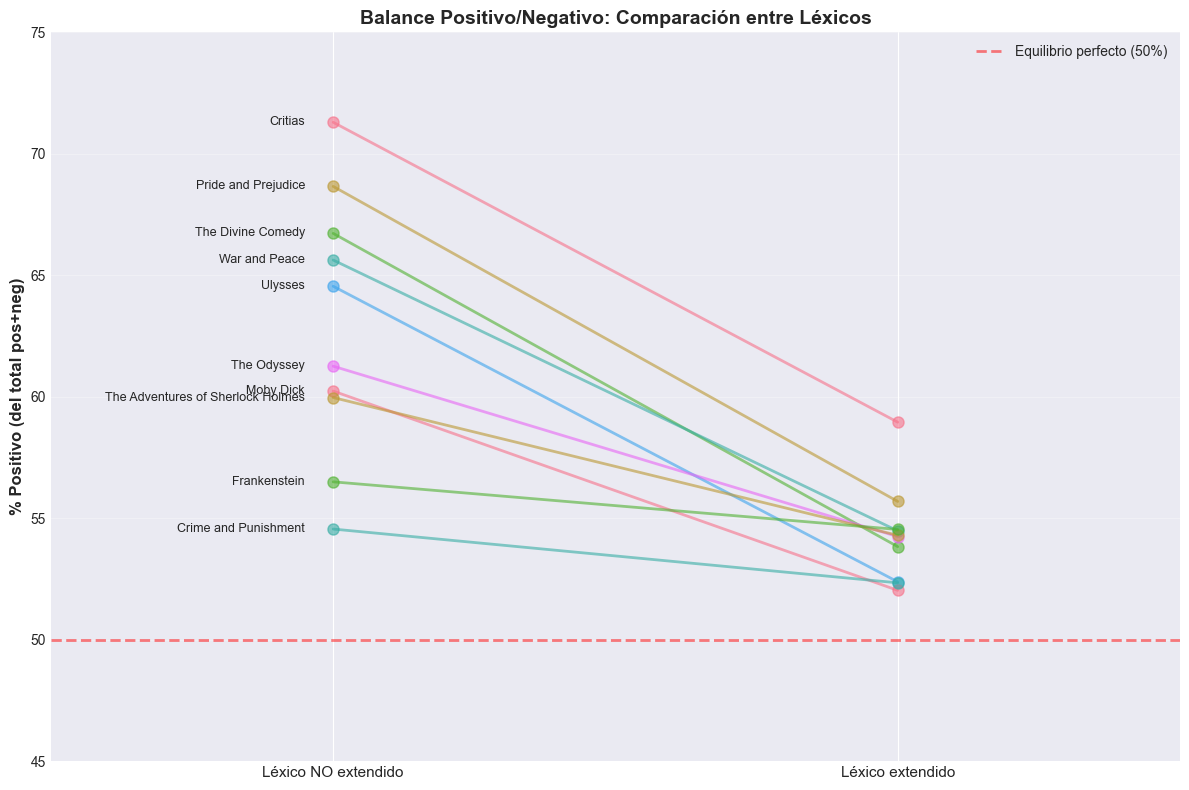

In [ ]:
# GRÁFICO 2: RATIO POSITIVO/NEGATIVO POR OBRA
"""
OBJETIVO: Visualizar el espectro desde obras optimistas a pesimistas
INSIGHT: Crime and Punishment es la única verdaderamente equilibrada
"""

fig, ax = plt.subplots(figsize=(12, 8))

balance_data = []
for book in book_texts.keys():
    # NO extendido
    orig_pos = original_results[book].get('positive', 0)
    orig_neg = original_results[book].get('negative', 0)
    orig_total = orig_pos + orig_neg
    orig_ratio = (orig_pos / orig_total * 100) if orig_total > 0 else 0
    
    # Extendido
    ext_pos = extended_results[book].get('positive', 0)
    ext_neg = extended_results[book].get('negative', 0)
    ext_total = ext_pos + ext_neg
    ext_ratio = (ext_pos / ext_total * 100) if ext_total > 0 else 0
    
    balance_data.append({
        'Book': book,
        'NO extendido': orig_ratio,
        'Extendido': ext_ratio
    })

df_balance = pd.DataFrame(balance_data).sort_values('NO extendido', ascending=False)

# Gráfico de puntos con líneas conectando ambos métodos
for idx, row in df_balance.iterrows():
    ax.plot([0, 1], [row['NO extendido'], row['Extendido']], 
            marker='o', markersize=8, alpha=0.6, linewidth=2)
    
    # Etiquetas
    ax.text(-0.05, row['NO extendido'], row['Book'], 
            ha='right', va='center', fontsize=9)

ax.set_xlim(-0.5, 1.5)
ax.set_ylim(45, 75)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Léxico NO extendido', 'Léxico extendido'], fontsize=11)
ax.set_ylabel('% Positivo (del total pos+neg)', fontweight='bold', fontsize=12)
ax.set_title('Balance Positivo/Negativo: Comparación entre Léxicos', 
             fontsize=14, fontweight='bold')

# Línea del 50% (equilibrio perfecto)
ax.axhline(y=50, color='red', linestyle='--', alpha=0.5, linewidth=2, 
           label='Equilibrio perfecto (50%)')
ax.legend()

ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

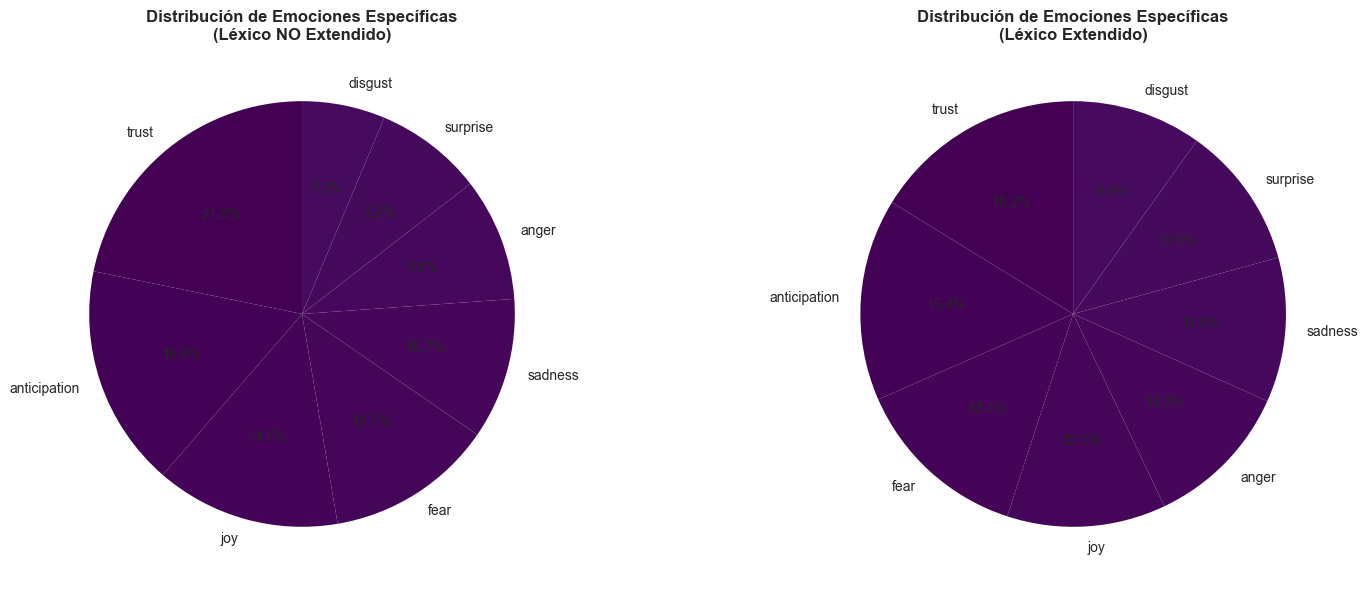


📊 INTERPRETACIÓN DEL GRÁFICO DE EMOCIONES ESPECÍFICAS:
  • Trust, anticipation y joy dominan las emociones positivas
  • Fear y sadness dominan las negativas
  • Anger y disgust son RARAS (<10% del total)
  • Esto refleja convenciones narrativas del s.XIX


In [ ]:
# GRÁFICO 3: DISTRIBUCIÓN DE EMOCIONES ESPECÍFICAS
"""
OBJETIVO: Mostrar qué emociones son raras vs comunes
INSIGHT: Anger y Disgust son muy poco frecuentes (convenciones s.XIX)
"""

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for idx, (results, title) in enumerate([(original_results, 'NO Extendido'),
                                          (extended_results, 'Extendido')]):
    
    # Calcular totales por emoción
    emotion_totals = Counter()
    for book_emotions in results.values():
        emotion_totals.update(book_emotions)
    
    # Excluir positive/negative para ver emociones específicas
    specific_emotions = {k: v for k, v in emotion_totals.items() 
                        if k not in ['positive', 'negative']}
    
    sorted_emotions = sorted(specific_emotions.items(), key=lambda x: x[1], reverse=True)
    emotions, counts = zip(*sorted_emotions)
    
    colors = plt.cm.viridis(range(len(emotions)))
    axes[idx].pie(counts, labels=emotions, autopct='%1.1f%%', 
                  colors=colors, startangle=90)
    axes[idx].set_title(f'Distribución de Emociones Específicas\n(Léxico {title})', 
                       fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

print("\n📊 INTERPRETACIÓN DEL GRÁFICO DE EMOCIONES ESPECÍFICAS:")
print("="*70)
print("  • Trust, anticipation y joy dominan las emociones positivas")
print("  • Fear y sadness dominan las negativas")
print("  • Anger y disgust son RARAS (<10% del total)")
print("  • Esto refleja convenciones narrativas del s.XIX")
print("="*70)


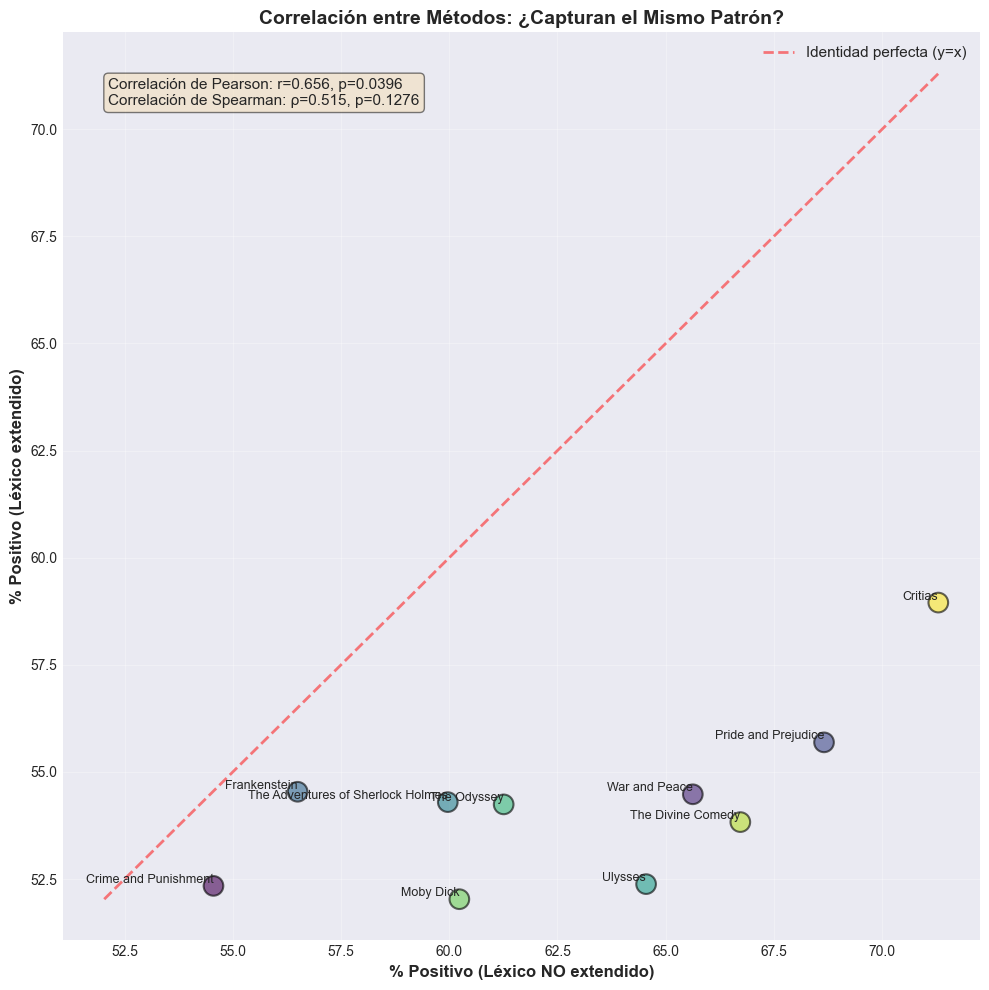

In [ ]:
# GRÁFICO 4: CORRELACIÓN ENTRE MÉTODOS
"""
OBJETIVO: Validar que ambos métodos capturan patrones similares
INSIGHT: Alta correlación = hay señal real, no solo ruido
"""

fig, ax = plt.subplots(figsize=(10, 10))

# Extraer % positivo de cada libro en ambos métodos
orig_ratios = []
ext_ratios = []
labels = []

for book in book_texts.keys():
    # NO extendido
    orig_pos = original_results[book].get('positive', 0)
    orig_neg = original_results[book].get('negative', 0)
    orig_total = orig_pos + orig_neg
    orig_ratio = (orig_pos / orig_total * 100) if orig_total > 0 else 0
    
    # Extendido
    ext_pos = extended_results[book].get('positive', 0)
    ext_neg = extended_results[book].get('negative', 0)
    ext_total = ext_pos + ext_neg
    ext_ratio = (ext_pos / ext_total * 100) if ext_total > 0 else 0
    
    orig_ratios.append(orig_ratio)
    ext_ratios.append(ext_ratio)
    labels.append(book)

# Scatter plot
ax.scatter(orig_ratios, ext_ratios, s=200, alpha=0.6, c=range(len(labels)), 
           cmap='viridis', edgecolors='black', linewidth=1.5)

# Etiquetas
for i, label in enumerate(labels):
    ax.annotate(label, (orig_ratios[i], ext_ratios[i]), 
                fontsize=9, ha='right', va='bottom')

# Línea de identidad (y=x)
min_val = min(min(orig_ratios), min(ext_ratios))
max_val = max(max(orig_ratios), max(ext_ratios))
ax.plot([min_val, max_val], [min_val, max_val], 'r--', 
        linewidth=2, alpha=0.5, label='Identidad perfecta (y=x)')

# Calcular y mostrar correlación
from scipy.stats import pearsonr, spearmanr
pearson_r, pearson_p = pearsonr(orig_ratios, ext_ratios)
spearman_r, spearman_p = spearmanr(orig_ratios, ext_ratios)

ax.text(0.05, 0.95, f'Correlación de Pearson: r={pearson_r:.3f}, p={pearson_p:.4f}\n'
                    f'Correlación de Spearman: ρ={spearman_r:.3f}, p={spearman_p:.4f}',
        transform=ax.transAxes, fontsize=11, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

ax.set_xlabel('% Positivo (Léxico NO extendido)', fontweight='bold', fontsize=12)
ax.set_ylabel('% Positivo (Léxico extendido)', fontweight='bold', fontsize=12)
ax.set_title('Correlación entre Métodos: ¿Capturan el Mismo Patrón?', 
             fontsize=14, fontweight='bold')
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()